In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
import sklearn.metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.isotonic import  IsotonicRegression
from sklearn.tree import *
from sklearn.ensemble import *
import math
from sklearn.model_selection import train_test_split

np.random.seed(42)

C:\Users\keipa\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**task 1**
Изучите классическую работу У. Рурмаира о криптографических атаках с помощью машинного обучения на ФНФ.

**task 2**
Сформулируйте задачу в терминах машинного обучения.



Задача - научить модель предсказывать ответы по набору запросов имитируя неклонируемую функцию.

Каждый объект это набор сигналов 01010111

Каждый ответ это число 0 или 1

In [6]:
def boston():
    from sklearn.datasets import load_boston
    boston = load_boston()

    x = boston["data"]
    y = boston["target"]
    return x,y

def puf(max_attrsize = 128, max_files = 1, max_lines = 1000, path = "C:\\Users\\keipa\\Desktop\\labs\\bsuir-labs\\11cem\\ml\\lab11\\dataset\\"):
    import os
    files = [path+file for file in os.listdir(path)][:max_files]
    x = []
    y = []
    print("loading files...")
    for file in files:
        with open(file) as f:
            contents = f.readlines()[:max_lines]
            for content in tqdm(contents):
                sub_x, sub_y = content.split()
                x_elem = [0 for _ in range(max_attrsize - len(sub_x))]+[int(ch) for ch in sub_x]
                x.append(x_elem)
                y.append(int(sub_y))
    x = np.array(x)
    y = np.array(y)
    return x,y

# x,y = boston()
x,y = puf(max_lines = 10000)
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=.75, test_size=.25, random_state=42)


# task 3
# Обучите модель, которая могла бы предсказывать ответы по запросам, которых нет в обучающей выборке.

def pred_example():
    regressor = DecisionTreeRegressor()
    regressor.fit(x_train, y_train)
    a1_pred = regressor.predict(x_test)
    print("Prediction example x = {}, y = {}".format(x_test[0], a1_pred[0]))

pred_example()

loading files...


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7936.51it/s]


Prediction example x = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1], y = 1.0


In [7]:
def learn(x_train, y_train, x_test, alg=DecisionTreeRegressor):
    regressor = alg()
    regressor.fit(x_train, y_train)
    return regressor.predict(x_test)

def regressors():
    learn_algs = [DecisionTreeRegressor, LinearRegression, GradientBoostingRegressor]
    preds = [learn(x_train, y_train, x_test, alg=alg) for alg in learn_algs]
    
    # task 5
    # Какая метрика наиболее подходит для оценки качества алгоритма?

    accuracy_algs = [sklearn.metrics.mean_squared_error,
                     sklearn.metrics.mean_absolute_error,
                     sklearn.metrics.median_absolute_error]
    
    accs = [alg(y_test, preds[0]) for alg in accuracy_algs]
    print("metrics")
    print(accs)

regressors()

metrics
[0.4876, 0.4876, 0.0]


Доля правильных ответов(accuracy) или f-mera - это лучшие метрики для классификации

Лучшая метрика для Regression metrics - rmse

In [8]:
# task 4
# Применить как минимум 3 различных алгоритма (например, метод опорных векторов, логистическая регрессия и градиентный бустинг).

# task 6
# Какой наибольшей доли правильных ответов (Accuracy) удалось достичь?


from sklearn.svm import LinearSVC


def best_classifier():
    learn_algs = [DecisionTreeClassifier, LinearSVC, GradientBoostingClassifier]

    print("learning")
    preds = [learn(x_train, y_train, x_test, alg=alg) for alg in learn_algs]
    accs = [sklearn.metrics.accuracy_score(y_test, pred) for pred in preds]


    print("classifiers")
    print(accs)
    print("Best accuracy: {}".format(max(accs)))

best_classifier()

learning
classifiers
[0.5108, 0.5556, 0.57]
Best accuracy: 0.57


boosting - 0.572472

In [14]:
# task 7
# Какой размер обучающей выборки необходим, чтобы достигнуть доли правильных ответов минимум 0.95?

gen_x = np.array([i for i in [100., 1000., 10000., 100000., 200000., 300000., 400000., 500000.]])
gen_y = np.array([[i] for i in [0.36, 0.532, 0.57, 0.5668, 0.56922, 0.5695066666666667, 0.56809, 0.5716]])

lin = LinearRegression()
lin.fit(gen_y, gen_x)
print(lin.predict(.95)[0])

704844.7884718626


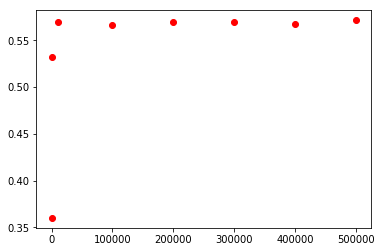

In [15]:
# task 8
# Как зависит доля правильных ответов от N?

plt.plot(gen_x, gen_y, "ro")
plt.show()

loading files...


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8474.58it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 9583.13it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 30000/30000 [00:03<00:00, 9416.20it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:04<00:00, 9084.71it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 9954.21it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:06<00:00, 9726.05it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [00:07<00:00, 9087.37it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 80000/80000 [00:08<00:00, 9090.91it/s]


loading files...


100%|██████████████████████████████████████████████████████████████████████████| 90000/90000 [00:10<00:00, 8326.39it/s]


loading files...


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9146.62it/s]


[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
[0.5793333333333334, 0.571, 0.5671111111111111, 0.5531666666666667, 0.5593333333333333, 0.569, 0.576, 0.5625833333333333, 0.5735555555555556, 0.5668]


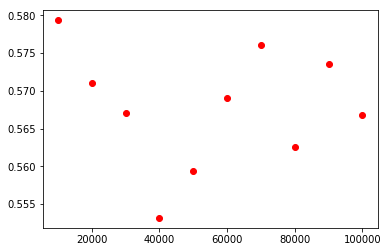

In [11]:
def get_accuracy(x_train, x_test, y_train, y_test):
    pred = learn(x_train, y_train, x_test, alg=GradientBoostingClassifier)
    return sklearn.metrics.accuracy_score(y_test, pred)

gen_x = []
gen_y = []

for ml in [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]:
    gen_x.append(ml)
    x,y = puf(max_lines = ml, max_files=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=.85, test_size=.15, random_state=42)
    gen_y.append(get_accuracy(x_train, x_test, y_train, y_test))


print(gen_x)
print(gen_y)
plt.plot(gen_x, gen_y, "ro")

plt.show()
# task 9
# Ответы на вопросы представьте в виде графиков.